In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from numpy.linalg import svd
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv("count_data.csv")

In [4]:
df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [5]:
df.shape

(2000000, 4)

In [6]:
print(df.columns)

Index(['Unnamed: 0', 'user_id', 'song_id', 'play_count'], dtype='object')


In [7]:
df.head()

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
print("Number of missing values:\n", df.isnull().sum())

Number of missing values:
 Unnamed: 0    0
user_id       0
song_id       0
play_count    0
dtype: int64


**Check the sparsity of the data**

In [10]:
print("Number of users:",df['user_id'].nunique())

Number of users: 76353


In [11]:
print("Number of songs:",df['song_id'].nunique())

Number of songs: 10000


**Observation** Based on the number of the users and songs, there could be 76353*10000=763530000 records but only 2000000 are available which is 0.26%. So the data is very sparse and some sampling is required.

**Checking the Distribution of the Intractions of the Users**

In [12]:
user_interactions=df.groupby(['user_id'])['song_id'].count()
user_interactions

user_id
00003a4459f33b92906be11abe0e93efc423c0ff     7
00005c6177188f12fb5e2e82cdbd93e8a3f35e64     5
00030033e3a2f904a48ec1dd53019c9969b6ef1f     9
0007235c769e610e3d339a17818a5708e41008d9    10
0007c0e74728ca9ef0fe4eb7f75732e8026a278b     9
                                            ..
fffce9c1537fbc350ea68823d956eaa8f5236dbe    44
fffd6a2bdef646ce9898b628d5dd56c43df69a9d    11
fffd9635b33f412de8ed02e44e6564e3644cf3c6    17
fffe6d1d8500f1c1f31bd63abce35c0f975a86bf     7
fffea3d509760c984e7d40789804c0e5e289cc86    23
Name: song_id, Length: 76353, dtype: int64

In [13]:
user_interactions.describe()

count    76353.000000
mean        26.194125
std         31.625078
min          1.000000
25%          9.000000
50%         16.000000
75%         31.000000
max        711.000000
Name: song_id, dtype: float64

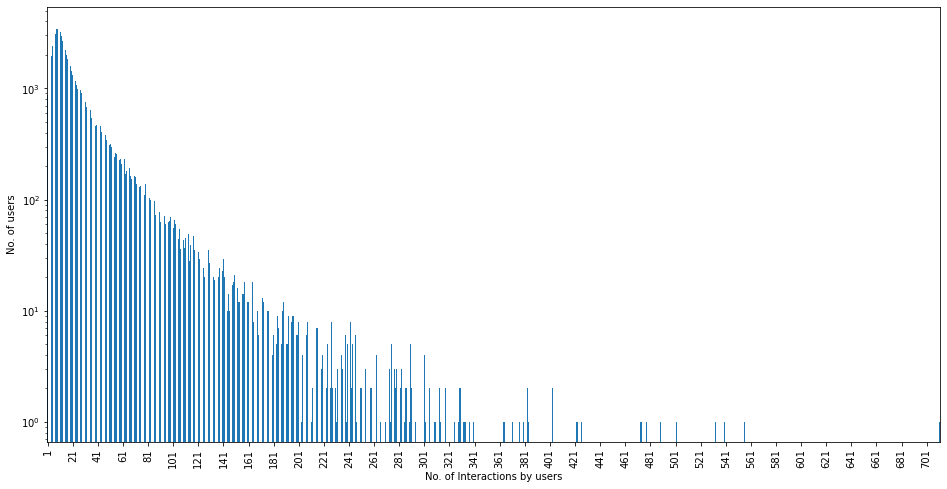

In [14]:
ax=user_interactions.value_counts().plot(kind='bar',figsize=(16,8),xticks=np.arange(user_interactions.min(), user_interactions.max(), 20))
ax.set_xlabel("No. of Interactions by users")
ax.set_ylabel("No. of users")
plt.yscale('log')
plt.show()

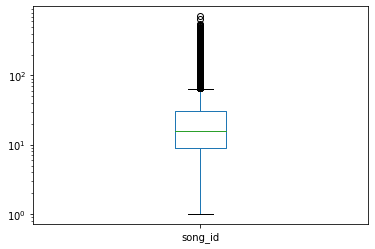

In [17]:
plt.yscale('log')
user_interactions.plot(kind='box')
plt.show()

**Observation**
<br>
1. The most number of songs played by one user is 711. It means the most interacted user listened to 711 different songs. Considering the number of the songs (10000), even the most interacted user has lisnted to less than 10% of the songs which is shows pretty low interactions of the users that cause sparsity of the data. 
<br>
2. The least number of songs played by one user is 1. It means the least interacted user listened to just 1 song.
<br>
3. In average one user listened to almost 26 different songs.

**Sampling (keeping the users with at least 50 interactions)**

Inorder to reduce computation time and sparcity of the data we do sampling and only keep the users of at least 50 interactions. The minimum number of interactions has been chosen 50 which is between the value of Q3 and the upper fence (Q3 + 1.5 IQR). 

In [18]:
interaction_df=pd.DataFrame(df.groupby(['user_id'])['song_id'].count())
interaction_df=interaction_df.loc[interaction_df['song_id']>50]
interaction_df

,song_id
user_id,
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,57
000ebc858861aca26bac9b49f650ed424cf882fc,94
00185e316f07f0f00c325ca034be59c15b362401,115
002543003041db1d049206b09426d5cdffc0f451,55
0028292aa536122c1f86fd48a39bd83fe582d27f,84
...,...
fff03efd1550136063389fa71125194614e1c68f,152
fff0b1ab076f0b71cbde9c7dcbcfca400708d845,73
fff300cd094fe04030b79fae550dc9d065190182,51


In [19]:
df=df.loc[df['user_id'].isin(list(interaction_df.index))]

In [20]:
df['user_id'].nunique()

9700

In [21]:
df

,Unnamed: 0,user_id,song_id,play_count
130,130,b64cdd1a0bd907e5e00b39e345194768e330d652,SOAFTRR12AF72A8D4D,3
131,131,b64cdd1a0bd907e5e00b39e345194768e330d652,SOALEQA12A58A77839,1
132,132,b64cdd1a0bd907e5e00b39e345194768e330d652,SOATNYF12AF72A8D48,3
133,133,b64cdd1a0bd907e5e00b39e345194768e330d652,SOBDKVR12A8C13E705,1
134,134,b64cdd1a0bd907e5e00b39e345194768e330d652,SOBDMNP12AF72AB1E1,2
...,...,...,...,...
1999995,1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2
1999996,1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4
1999997,1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3
1999998,1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1


**Check the sparsity of the data after sampling**

In [22]:
df['user_id'].nunique()

9700

In [23]:
df['song_id'].nunique()

10000

In [24]:
df.shape

(868041, 4)

**Observation:** After sampling, there density of the user-song interactions has increased to 0.89%.

**Check for duplication**

In [25]:
df.groupby(['user_id','song_id']).count().sum()

Unnamed: 0    868041
play_count    868041
dtype: int64

**Observation** There is no duplicant data for the same user and same song.

**Checking the distribution of the play_counts**

In [26]:
df['play_count'].describe()

count    868041.000000
mean          2.724329
std           5.576602
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2213.000000
Name: play_count, dtype: float64

<AxesSubplot:>

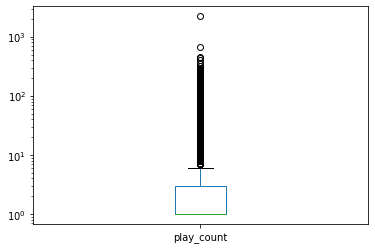

In [27]:
plt.yscale('log')
df['play_count'].plot(kind='box')

In [28]:
df.loc[df['play_count']<=round(df['play_count'].mean())].shape

(709711, 4)

In [29]:
IQR=df['play_count'].quantile(0.75)-df['play_count'].quantile(0.25)
IQR

2.0

In [30]:
outrange=df['play_count'].quantile(0.75)+1.5*IQR
outrange

6.0

In [31]:
df.loc[df['play_count']>outrange].shape

(67663, 4)

In [32]:
df.shape

(868041, 4)

**Observation**
<BR>1. Almost 82% (709711/868041) of the interactions are of less than 3 play_counts. This means ignoring the outliers, most of the songs have been listened only a few number of times for a given user.  
<BR>2. Only 8% (67663/868041) of interactions are of more than 6 play_counts. This means that a small fractions of songs are really popular among most of the users.

**Checking the outliers**

In [33]:
df['play_count'].nunique()

200

In [34]:
df['play_count'].describe()

count    868041.000000
mean          2.724329
std           5.576602
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2213.000000
Name: play_count, dtype: float64

<AxesSubplot:>

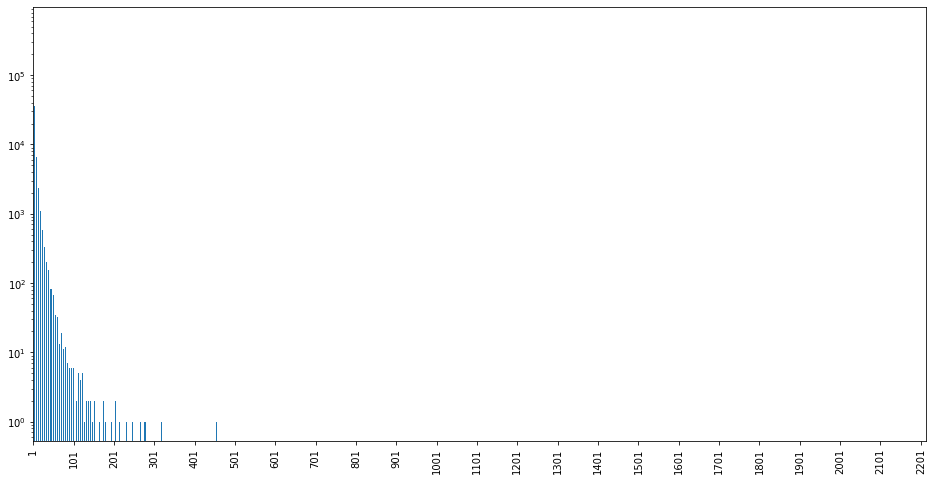

In [35]:
plt.yscale('log')
df['play_count'].value_counts().plot(kind='bar',figsize=(16,8),xticks=np.arange(df['play_count'].min(), df['play_count'].max(), 100))

In [36]:
#Q3 + (1.5 * IQR)
Q3=df['play_count'].quantile(0.75)
IQR=Q3-df['play_count'].quantile(0.25)
upper_fence=Q3+1.5*IQR
upper_fence

6.0

In [37]:
print(np.around(100-(df.shape[0]-df.loc[df['play_count']>upper_fence].shape[0])/df.shape[0]*100), "% are above the upper fece.")

8.0 % are above the upper fece.


**Observation**
<BR>8.0 % of the users listen to a particular song more than 6 times which are considered as outliers.

**Calculate user-song matrix (ineractions matrix)**

In [38]:
interactions_matrix=df.pivot(index = 'user_id', columns ='song_id', values = 'play_count').fillna(0)

In [39]:
interactions_matrix.shape

(9700, 10000)

**Build Popularity based Recommendation System by Averaging**

In [40]:
average_rating=df

In [41]:
average_rating=average_rating.drop('user_id',axis=1)

In [42]:
average_rating['n_users']=average_rating.groupby('song_id')['song_id'].transform('count')

In [43]:
average_rating=average_rating.sort_values(by=['n_users'],ascending=False)

In [44]:
average_rating=average_rating.groupby(['song_id']).agg({'play_count':['sum'],'n_users':['mean']})

In [45]:
average_rating.columns

MultiIndex([('play_count',  'sum'),
            (   'n_users', 'mean')],
           )

In [46]:
average_rating=average_rating.sort_values(by=[('play_count', 'sum')],ascending=False)

In [47]:
average_rating

,play_count,n_users
,sum,mean
song_id,,
SOBONKR12A58A7A7E0,13060,1567
SOAUWYT12A81C206F1,12846,1710
SOSXLTC12AF72A7F54,10675,1761
SOAXGDH12A8C13F8A1,10627,2361
SOFRQTD12A81C233C0,9211,2257
...,...,...
SOSCCPA12A6D4F882B,17,7
SOJTLLT12A8C136BBB,16,10


In [48]:
average_rating[('play_count','sum')].describe()

count    10000.000000
mean       236.482900
std        451.945239
min         12.000000
25%         87.000000
50%        138.000000
75%        239.000000
max      13060.000000
Name: (play_count, sum), dtype: float64

In [49]:
average_rating[('n_users','mean')].describe()

count    10000.000000
mean        86.804100
std        121.639642
min          6.000000
25%         36.000000
50%         54.000000
75%         93.000000
max       2361.000000
Name: (n_users, mean), dtype: float64

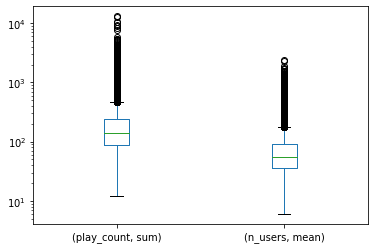

In [50]:
average_rating.plot(kind='box')
plt.yscale('log')
plt.show()

In [51]:
def recommend_by_averaging(average_rating,n):
    
    #get the songs of the most number of plays listened by at least the average number of people  
    min_n_users=average_rating[('n_users','mean')].mean()
    toplist=average_rating[(average_rating[('n_users','mean')]>min_n_users)]

    return toplist[('n_users','mean')][0:10]

In [52]:
recommend_by_averaging(average_rating,10)

song_id
SOBONKR12A58A7A7E0    1567
SOAUWYT12A81C206F1    1710
SOSXLTC12AF72A7F54    1761
SOAXGDH12A8C13F8A1    2361
SOFRQTD12A81C233C0    2257
SOEGIYH12A6D4FC0E3    1397
SOPUCYA12A8C13A694    1278
SONYKOW12AB01849C9    1879
SOUFTBI12AB0183F65     883
SOTCMDJ12A6D4F8528     867
Name: (n_users, mean), dtype: int64

**Build Collaborative Filtering based Recommendation System**

In [53]:
interactions_matrix_by_index=interactions_matrix

In [54]:
interactions_matrix_by_index['user_index'] = np.arange(0, interactions_matrix_by_index.shape[0], 1)
interactions_matrix_by_index.set_index(['user_index'], inplace=True)

# Actual ratings given by users
interactions_matrix_by_index.head()

song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZKPR12A6D4F8147,SOZZLTY12A67AE0AD0,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# defining a function to get similar users and return the most similar users indexes and their similarity scores
def similar_users(user_index, interactions_matrix_by_index):
    s=cosine_similarity(interactions_matrix_by_index)
    sd=pd.DataFrame(s[user_index],columns=['score'])
    sd['index_']=list(range(0,s.shape[0]))
    sd=sd.sort_values(by=['score'],ascending=False)
    sd.reset_index(inplace=True)
    
    return sd['index_'],sd['score']

In [56]:
#finding similar users indexes and their score for the user with index=6
sim_indexes,scores = similar_users(6,interactions_matrix_by_index)

In [57]:
sim_indexes[0:10]

0       6
1    5035
2    3449
3    1350
4    6626
5    3782
6    4051
7    2051
8    1484
9    4920
Name: index_, dtype: int64

In [58]:
scores[0:10]

0    1.000000
1    0.320309
2    0.196865
3    0.191270
4    0.176136
5    0.174991
6    0.165504
7    0.160846
8    0.157683
9    0.154672
Name: score, dtype: float64

In [59]:
#finding top10 similar users with their user_id
for i in sim_indexes[0:10]:
    print(interactions_matrix.index[i])

6
5035
3449
1350
6626
3782
4051
2051
1484
4920


In [60]:
# defining the recommendations function to get recommendations by using the similar users preferences and return the recommendations of products
def recommend_by_similarity(n_songs,user_index,interactions_matrix_by_index,flag):

    index,score=similar_users(user_index,interactions_matrix_by_index)
    
    song_ids=set(list(interactions_matrix_by_index.columns[np.array(interactions_matrix_by_index.iloc[user_index]).nonzero()]))
    rec_list=[]
    rec_list_counts=[]
    
    #if flag is set to 1, it will consider the values of the user as well
    if(flag==1):
        t=set()
    #if the flag is zero it will only check the similar users values 
    elif(flag==0):
        t=song_ids.copy()
    else:
        print("Flag is not set properly")
        return

    
    for user in index:
        if len(rec_list)<n_songs:
            
            similar_user_song_ids=set(list(interactions_matrix_by_index.columns[np.array(interactions_matrix_by_index.iloc[user]).nonzero()]))
            similar_user_song_counts=list(((interactions_matrix_by_index.iloc[[user]])[list(similar_user_song_ids)]).iloc[0])                            
            
            diff=list(similar_user_song_ids.difference(t))
            rec_list.extend(diff)
            
            indices=[]
            for i in range(len(diff)):
                indices.append(list(similar_user_song_ids).index(diff[i]))
            rec_list_counts.extend(list(np.array(list(similar_user_song_counts))[indices]))
            
            t = t.union(similar_user_song_ids)
        else:
            break
            
    rec_df=pd.DataFrame(index=rec_list,data=rec_list_counts)
    rec_df.columns=['play_counts']
    rec_df=rec_df.sort_values(by='play_counts',ascending=False).head(n_songs)
    
    return(rec_df)    

In [61]:
recommend_by_similarity(10,13,interactions_matrix_by_index,1)

,play_counts
SOLGLUC12AB018A8FA,33.0
SOOONKL12AB0187911,23.0
SOSJRJP12A6D4F826F,20.0
SOTUARP12A8C13CB54,18.0
SOGSAYQ12AB018BA14,17.0
SOPGYCQ12A6D4FB4DC,15.0
SONNKKX12A81C22CAC,15.0
SOGWJEY12AC9618862,10.0
SOHHZKM12A6D4F70DA,10.0
SOTASGN12AC9075A8F,9.0


**Build recommendation system using SVD**

In [62]:
interactions_matrix=df.pivot(index = 'user_id', columns ='song_id', values = 'play_count').fillna(0)

In [63]:
#split data to test and train to find the optimum number of latent features
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

In [64]:
df.shape

(868041, 4)

In [65]:
X_train.shape

(694432, 4)

In [66]:
X_test.shape

(173609, 4)

In [67]:
interactions_matrix_train = X_train.pivot(index = 'user_id', columns ='song_id', values = 'play_count')
interactions_matrix_train.fillna(0, inplace=True)

In [68]:
interactions_matrix_train.shape

(9700, 10000)

In [69]:
interactions_matrix_test = X_test.pivot(index = 'user_id', columns ='song_id', values = 'play_count')
interactions_matrix_test.fillna(0, inplace=True)

In [70]:
interactions_matrix_test.shape

(9700, 9986)

In [71]:
train_idx = set(interactions_matrix_train.index)
test_idx = set(interactions_matrix_test.index)

train_movies = set(interactions_matrix_train.columns)
test_movies = set(interactions_matrix_test.columns)

match_idx = train_idx.intersection(test_idx)
match_cols = train_movies.intersection(test_movies)

In [72]:
interactions_matrix_test=interactions_matrix_test.loc[list(match_idx),list(match_cols)]

In [73]:
interactions_matrix_test.shape

(9700, 9986)

In [74]:
u_train, s_train, vt_train = np.linalg.svd(interactions_matrix_train, full_matrices=False)

In [75]:
row_idxs = interactions_matrix_train.index.isin(test_idx)
col_idxs = interactions_matrix_train.columns.isin(test_movies)
u_test = u_train[row_idxs, :]
vt_test = vt_train[:, col_idxs]

In [76]:
latent_features = np.arange(0, 700, 20)
train_error = []
test_error = []

for k in latent_features:
    s_train_lat, u_train_lat, vt_train_lat = np.diag(s_train[:k]), u_train[:, :k], vt_train[:k, :]
    u_test_lat, vt_test_lat = u_test[:, :k], vt_test[:k, :]
    
    interactions_matrix_train_preds = np.around(np.dot(np.dot(u_train_lat, s_train_lat), vt_train_lat))
    interactions_matrix_test_preds = np.around(np.dot(np.dot(u_test_lat, s_train_lat), vt_test_lat))
    
    train_difference = np.subtract(interactions_matrix_train, interactions_matrix_train_preds)
    test_difference = np.subtract(interactions_matrix_test, interactions_matrix_test_preds)
    
    error_train = np.sum(np.sum(np.abs(train_difference)))
    error_test = np.sum(np.sum(np.abs(test_difference)))
    
    train_error.append(error_train)
    test_error.append(error_test)


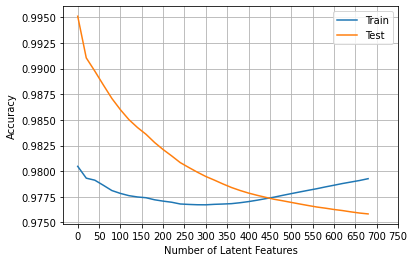

In [77]:
plt.plot(latent_features, 1 - np.array(train_error)/(interactions_matrix_train.shape[0]*interactions_matrix_test.shape[1]), label='Train');
plt.plot(latent_features, 1 - np.array(test_error)/(interactions_matrix_test.shape[0]*interactions_matrix_test.shape[1]), label='Test');
plt.xlabel('Number of Latent Features');
plt.ylabel('Accuracy');
plt.legend();
plt.xticks(np.arange(0, 800, step=50))
plt.grid(True)
plt.show()

It can be seen from above plot that at around latent features=400, we got a reasonable accuracy in both train and test dataset. If the latent features be increased it will be overfitted and if decreased the latent features will underfit the model.

Now reconstruct the matrices using latent features = 400

In [78]:
from scipy.sparse.linalg import svds # for sparse matrices
# Singular Value Decomposition
U, sigma, Vt = svds(interactions_matrix, k = 400) 
# Construct diagonal array in SVD
sigma = np.diag(sigma)

In [79]:
interactions_matrix_pred = np.around(np.dot(np.dot(U,sigma),Vt))
predictions_matrix = pd.DataFrame(interactions_matrix_pred,index=interactions_matrix.index,columns=interactions_matrix.columns)
predictions_matrix.head()

song_id,SOAAAGQ12A8C1420C8,SOAACPJ12A81C21360,SOAACSG12AB018DC80,SOAAEJI12AB0188AB5,SOAAFAC12A67ADF7EB,SOAAFYH12A8C13717A,SOAAJMQ12A6D4F7D17,SOAAKPM12A58A77210,SOAALWN12A6D4F7FDA,SOAAMOW12AB018149B,...,SOZZKPR12A6D4F8147,SOZZLTY12A67AE0AD0,SOZZLZN12A8AE48D6D,SOZZRHE12A6702165F,SOZZTCU12AB0182C58,SOZZTNF12A8C139916,SOZZVWB12AB0189C30,SOZZWZV12A67AE140F,SOZZYAO12A6701FF36,SOZZZPV12A8C1444B5
user_id,,,,,,,,,,,,,,,,,,,,,
000e2c2a8c7870ff9121f212b35c8b3a20cc0e67,0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,...,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0
000ebc858861aca26bac9b49f650ed424cf882fc,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0
00185e316f07f0f00c325ca034be59c15b362401,-0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,...,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0
002543003041db1d049206b09426d5cdffc0f451,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,...,0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
0028292aa536122c1f86fd48a39bd83fe582d27f,-0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,-0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,0.0


In [80]:
def recommend_by_SVD(user_id,n,interactions_matrix, predictions_matrix):
    
    sorted_play_counts=(interactions_matrix.loc[user_id]).sort_values(ascending=False).head(n)  #sorted_user_ratings
    sorted_predictions=(predictions_matrix.loc[user_id]).sort_values(ascending=False).head(n)  #sorted_user_predictions

    return sorted_play_counts,sorted_predictions

In [81]:
recommend_by_SVD('00544d8bde0d7985e8d703c1eb676d41cad33c67',10, interactions_matrix,predictions_matrix )

(song_id
 SOLGLUC12AB018A8FA    33.0
 SOOONKL12AB0187911    23.0
 SOSJRJP12A6D4F826F    20.0
 SOTUARP12A8C13CB54    18.0
 SOGSAYQ12AB018BA14    17.0
 SONNKKX12A81C22CAC    15.0
 SOPGYCQ12A6D4FB4DC    15.0
 SOHHZKM12A6D4F70DA    10.0
 SOGWJEY12AC9618862    10.0
 SOSWWEU12AC9097E4C     9.0
 Name: 00544d8bde0d7985e8d703c1eb676d41cad33c67, dtype: float64,
 song_id
 SOLGLUC12AB018A8FA    29.0
 SOSJRJP12A6D4F826F    19.0
 SOTUARP12A8C13CB54    17.0
 SOGSAYQ12AB018BA14    15.0
 SOSXLTC12AF72A7F54     9.0
 SOHTCVN12A8C134E46     8.0
 SOFKFXC12AC90732A5     6.0
 SOYABSZ12A81C1FEAC     6.0
 SOLWAHM12AB018EBC8     4.0
 SODGVGW12AC9075A8D     4.0
 Name: 00544d8bde0d7985e8d703c1eb676d41cad33c67, dtype: float64)

**Evaluation of SVD**

In [82]:
def evaluate_svd(interactions_matrix,predictions_matrix):

    acc_df=pd.DataFrame(columns=['acc'])
    for user in list(interactions_matrix.index):
        p_top_songs=predictions_matrix.columns[np.array((predictions_matrix.loc[user]>np.around(df['play_count'].mean())))]
        top_songs=interactions_matrix.columns[np.array((interactions_matrix.loc[user]>np.around(df['play_count'].mean())))]
        acc=top_songs.isin(p_top_songs).sum()/len(p_top_songs)*100
        acc_df.loc[user]=acc
        
    return acc_df

In [83]:
acc_df=evaluate_svd(interactions_matrix,predictions_matrix)

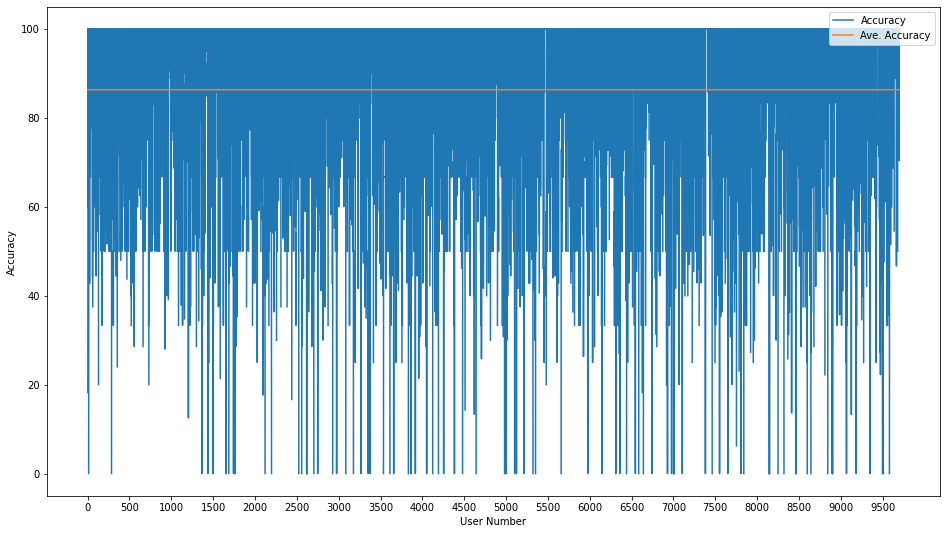

In [84]:
plt.figure(figsize=(16,9))
plt.plot(np.arange(0,acc_df.shape[0]),acc_df['acc'],label='Accuracy')
plt.plot(np.arange(0,acc_df.shape[0]), np.full((acc_df.shape[0],1), acc_df['acc'].mean()),label='Ave. Accuracy')
plt.xlabel('User Number');
plt.ylabel('Accuracy');
#plt.legend();
plt.legend(loc='upper right')
plt.xticks(np.arange(0, 10000, step=500))
plt.show()


In [85]:
print('The average accuracy of SVD is',np.around(acc_df['acc'].mean()))

The average accuracy of SVD is 86.0


**Observation**

SVD recommends the songs of high ratings very well (with 86% average accuracy).

**Recommend top10 song based on hybrid solution of SVD and popularity-based**

In [100]:
def RecommendTop10(user_id):
    
    sorted_play_counts,sorted_predictions=recommend_by_SVD(user_id,10,interactions_matrix, predictions_matrix)
    acc_df=evaluate_svd(interactions_matrix,predictions_matrix)
    acc_=acc_df.loc[user_id][0]
    if (acc_>10):
        return list(sorted_predictions.index)
        #return sorted_predictions,sorted_play_counts
    else:
        sorted_predictions=recommend_by_averaging(average_rating,10)
        return list(sorted_predictions.index)
        #return sorted_predictions,sorted_play_counts

In [101]:
RecommendTop10('000e2c2a8c7870ff9121f212b35c8b3a20cc0e67')

['SOQZYQH12A8AE468E5',
 'SONZWDK12A6701F62B',
 'SOIOESO12A6D4F621D',
 'SOAOAHZ12A8C13AAF1',
 'SONQEYS12AF72AABC9',
 'SOERYLG12A6701F07F',
 'SOHABTD12A67AE0CF8',
 'SOLRGNF12AB0187CF4',
 'SOZSFWW12AB017F5E7',
 'SOCNCGL127D9786D66']

In [102]:
RecommendTop10('fff6c30c773e6ffafcac213c9afd9666afaf6d63')

['SOUDLVN12AAFF43658',
 'SOJSQYL12A81C23901',
 'SOZVVRE12A8C143150',
 'SOADOQJ12A8AE45C7E',
 'SOMDVSL12A6D4F7230',
 'SOAJNYK12AF729F33B',
 'SOTTGXB12A6701FA0B',
 'SOWRREB12A6D4FA7CB',
 'SOVPAJA12A58A77B15',
 'SOHZMFE12A6D4FB412']

In [103]:
RecommendTop10('000ebc858861aca26bac9b49f650ed424cf882fc')

['SOBONKR12A58A7A7E0',
 'SOAUWYT12A81C206F1',
 'SOSXLTC12AF72A7F54',
 'SOAXGDH12A8C13F8A1',
 'SOFRQTD12A81C233C0',
 'SOEGIYH12A6D4FC0E3',
 'SOPUCYA12A8C13A694',
 'SONYKOW12AB01849C9',
 'SOUFTBI12AB0183F65',
 'SOTCMDJ12A6D4F8528']